In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

[('2017-08-23', 0.0), ('2017-08-23', 0.0), ('2017-08-23', 0.08), ('2017-08-23', 0.45)]


<AxesSubplot:xlabel='date'>

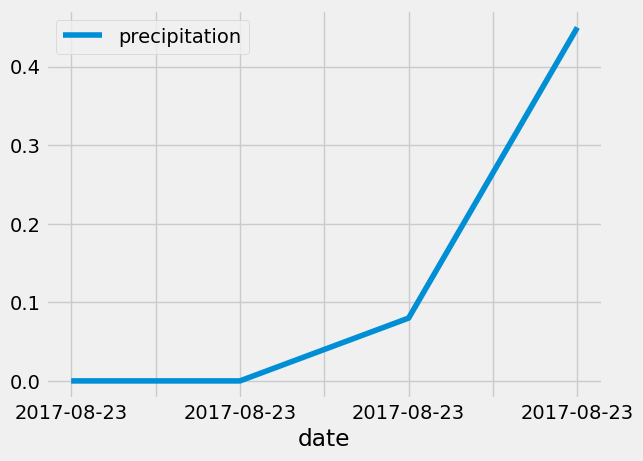

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
rev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []

# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.date, Measurement.prcp)
#print(results.all())

# Sort the dataframe by date
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df = pd.DataFrame(results, columns=['date','precipitation'])

In [22]:
# How many stations are available in this dataset?
df.set_index(df['date'], inplace=True)
print(df)
print(df.to_string(index=False))

                  date  precipitation
date                                 
2017-08-23  2017-08-23           0.00
2017-08-23  2017-08-23           0.00
2017-08-23  2017-08-23           0.08
2017-08-23  2017-08-23           0.45
      date  precipitation
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.08
2017-08-23           0.45


In [24]:
# What are the most active stations?
# List the stations and the counts in descending order.
df = df.sort_index()
print(df.to_string(index=False))

      date  precipitation
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.08
2017-08-23           0.45


In [26]:
df.describe()

,precipitation
count,4.0000
mean,0.1325
std,0.2150
min,0.0000
25%,0.0000
50%,0.0400
75%,0.1725
max,0.4500


In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.count(Station.station)).all()

[(9,)]

In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

# Challenge

In [32]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date <= prev_year).all()
print(results)

[(70.0,), (62.0,), (74.0,), (75.0,), (74.0,), (76.0,), (69.0,), (66.0,), (70.0,), (75.0,), (64.0,), (60.0,), (61.0,), (68.0,), (64.0,), (66.0,), (67.0,), (70.0,), (67.0,), (67.0,), (69.0,), (60.0,), (75.0,), (75.0,), (65.0,), (75.0,), (69.0,), (67.0,), (66.0,), (69.0,), (72.0,), (67.0,), (65.0,), (64.0,), (67.0,), (67.0,), (68.0,), (69.0,), (66.0,), (69.0,), (61.0,), (71.0,), (70.0,), (70.0,), (66.0,), (71.0,), (61.0,), (68.0,), (67.0,), (62.0,), (65.0,), (69.0,), (63.0,), (62.0,), (61.0,), (64.0,), (72.0,), (68.0,), (68.0,), (68.0,), (71.0,), (69.0,), (65.0,), (67.0,), (71.0,), (70.0,), (69.0,), (69.0,), (70.0,), (69.0,), (70.0,), (73.0,), (74.0,), (67.0,), (68.0,), (64.0,), (65.0,), (68.0,), (68.0,), (72.0,), (67.0,), (64.0,), (71.0,), (70.0,), (72.0,), (73.0,), (74.0,), (69.0,), (71.0,), (72.0,), (71.0,), (74.0,), (73.0,), (71.0,), (71.0,), (69.0,), (69.0,), (72.0,), (68.0,), (75.0,), (69.0,), (65.0,), (68.0,), (65.0,), (66.0,), (64.0,), (69.0,), (69.0,), (70.0,), (69.0,), (69.0,), 

In [33]:
df = pd.DataFrame(results, columns=['tobs'])
print(df)

      tobs
0     70.0
1     62.0
2     74.0
3     75.0
4     74.0
...    ...
2767  77.0
2768  77.0
2769  76.0
2770  76.0
2771  79.0

[2772 rows x 1 columns]


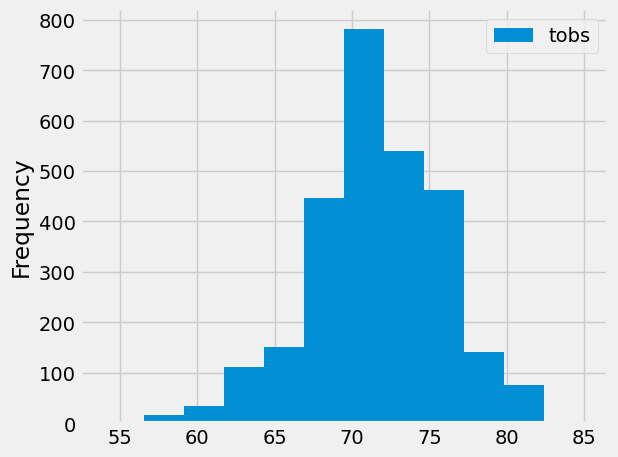

In [35]:
df.plot.hist(bins=12)
plt.tight_layout()

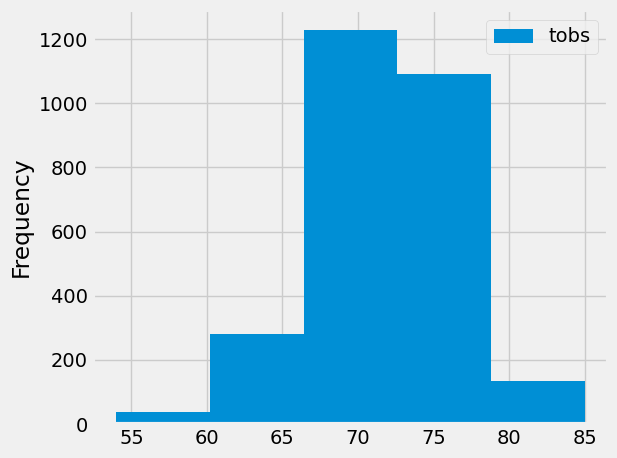

In [36]:
df.plot.hist(bins=5)
plt.tight_layout()

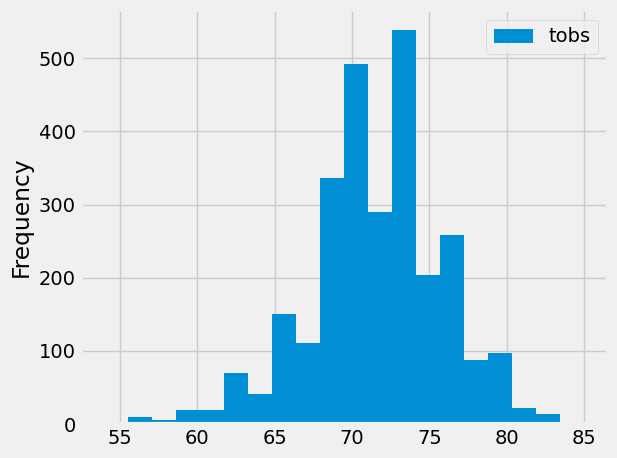

In [37]:
df.plot.hist(bins=20)
plt.tight_layout()